<a href="https://colab.research.google.com/github/VMBoehm/N3AS_Project_Malika/blob/main/8_Copy_of_First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from sklearn import datasets as datasets
from sklearn import model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
random_seed = 1534

In [43]:
## TASK: Play with different class_sep parameters, how does the model accuracy degrade/improve?
dataset = datasets.make_classification(n_samples=1000, n_features=4, random_state=random_seed, class_sep= .8)
## n_features = 5 does something weird, We talked about class_sep last monday.

In [44]:
features, labels = dataset
print(features.shape)

(1000, 4)


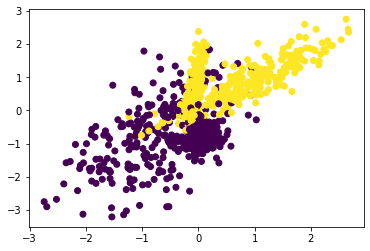

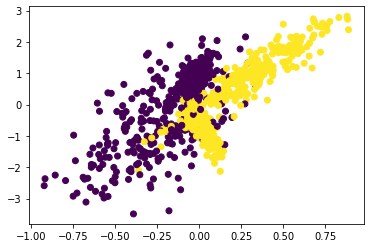

In [45]:
plt.scatter(features[:,0],features[:,1], c=labels)
plt.show()
plt.scatter(features[:,2],features[:,3], c=labels)
plt.show()

In [46]:
X_train, X_test, y_train, y_test = ms.train_test_split(features,labels, test_size = .2)

In [47]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (800, 4)
y_train: (800,)
X_test: (200, 4)
y_test: (200,)


In [48]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [49]:
basic_model = Sequential()

In [50]:


# Adding layers to the model
# First layers: 16 neurons/perceptrons that takes the input and uses Leaky ReLU activation function.

basic_model.add(Dense(units = 4 , activation = 'LeakyReLU', input_shape = (4,))) 
# Second layer: 1 neuron/perceptron that takes the input from the 1st layers and gives output as 0 or 1.Activation used is 'Hard Sigmoid'

# TASK: Can you change the output to be probabilistic (probability for each class) by using 'softmax' as an activation function?
#basic_model.add(Dense(1, activation = 'hard_sigmoid'))
### This is what I added. I think this is right.
basic_model.add(Dense(2, activation='softmax'))


In [51]:
# TASK optional): How does the Adam optimizer work? 
# from googling I have learned that the adam Optimizer is a Stochastic optimization. Which means its does graident optmaztion. I am acutally not really sure how it works
## I found this paper about it https://arxiv.org/pdf/1412.6980.pdf but its a little hard to understand.
## I know that basically it find how to get down hill the fastest
opt = keras.optimizers.Adam(learning_rate=0.01)
#TASK: What is binary cross entropy? What does it measure?
basic_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
## the Binary cross entropy is ued for our loss paramter which calculates the degree of errror. A neural network measures doesn't measure 
# acurracy but instead loss. This is than used to measure accuracy. Binary_crossentropy is used when you have a binary system like cats or dogs or 1 and 0




In [52]:
# TASK: add validation data (https://keras.io/api/models/model_training_apis/)
basic_model.fit(X_train, y_train, epochs=50, validation_data= (X_test, y_test))

Epoch 1/50
25/25 [==============================] - 1s 10ms/step - loss: 0.7192 - accuracy: 0.5200 - val_loss: 0.4619 - val_accuracy: 0.9000
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3899 - accuracy: 0.9112 - val_loss: 0.3396 - val_accuracy: 0.8850
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.9112 - val_loss: 0.3080 - val_accuracy: 0.8900
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3076 - accuracy: 0.9050 - val_loss: 0.3000 - val_accuracy: 0.8900
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3051 - accuracy: 0.9075 - val_loss: 0.2946 - val_accuracy: 0.8900
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2977 - accuracy: 0.9087 - val_loss: 0.2906 - val_accuracy: 0.8900
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.9137 - val_loss: 0.2874 - val_accuracy: 0.8950
Epoch 8/50
25/25 [=

In [53]:
train_p=basic_model.predict(X_train)



In [54]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])



7/7 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9000
Loss =  0.2528170049190521
Accuracy =  0.8999999761581421


In [55]:
## calulating accuracy from scartch
## so this is a binary acuraccy calcuation
from sklearn.preprocessing import normalize

probs = basic_model.predict(X_test)
preds = probs[:,1]

y_pred = (preds >= .5).astype('int')
print(np.shape(y_pred))
#y_pred = y_pred[:, 0]
y_pred_train = (X_train >= .5).astype('int')
y_pred_train = y_pred_train[:, 0]



matrix = normalize(X_test, axis=1, norm='l1')
y_pred_1 = matrix.sum(axis=1)

matrix_2 = normalize(X_train, axis=1, norm='l1')
y_pred_2 = matrix_2.sum(axis=1)
def compute_tp_tn_fn_fp(act, pred):

	tp = sum((act == 1) & (pred == 1))
	tn = sum((act == 0) & (pred == 0))
	fn = sum((act == 1) & (pred == 0))
	fp = sum((act == 0) & (pred == 1))
	return tp, tn, fp, fn

# tp_t, tn_t, fp_t, fn_t = compute_tp_tn_fn_fp(y_train,y_pred)

tp_k, tn_k, fp_k, fn_k = compute_tp_tn_fn_fp(y_test,y_pred )

def compute_accuracy(tp, tn, fn, fp):
  return((tp + tn) * 100)/ float( tp + tn + fn + fp)
  
#print("test acuuracy",compute_accuracy(tp_e, tn_e, fn_e, fp_e))

#print("train accuracy",compute_accuracy(tp_t, tn_t, fp_t, fn_t))

print("test acuuracy",compute_accuracy(tp_k, tn_k, fn_k, fp_k))
print("train accuracy",compute_accuracy(tp_t, tn_t, fp_t, fn_t))


(200,)
test acuuracy 90.0
train accuracy 100.0


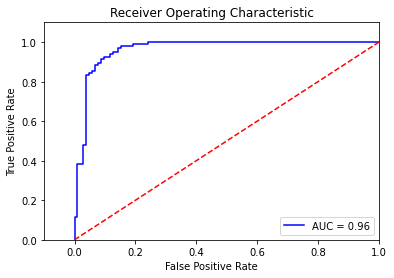

In [56]:
import sklearn.metrics as metrics
probs = basic_model.predict(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()